# Data Description
This data is a global monthly temperature anomaly.<br>
The average temperature used for the calculation is the average of the temperatures of the corresponding months over the 30-year period from 1961 to 1990.

# Data decoding

In [9]:
import netCDF4
from netCDF4 import Dataset
import xarray as xr 

In [10]:
file_path = "SURF_CLI_GLB_MST_MON_GRID_2DEG_202507.nc"

In [11]:
dataset = xr.open_dataset(file_path)
dataset

<xarray.Dataset> Size: 130kB
Dimensions:  (lat: 89, lon: 180)
Coordinates:
  * lat      (lat) int64 712B 88 86 84 82 80 78 76 ... -78 -80 -82 -84 -86 -88
  * lon      (lon) int64 1kB -180 -178 -176 -174 -172 ... 170 172 174 176 178
    month    int64 8B ...
Data variables:
    anomaly  (lat, lon) float64 128kB ...

# Visualization

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset

In [13]:
ncfile = Dataset(file_path)
lon = ncfile["lon"][:]
lat = ncfile["lat"][:]
ano = ncfile["anomaly"][:]
mon = ncfile["month"][:]

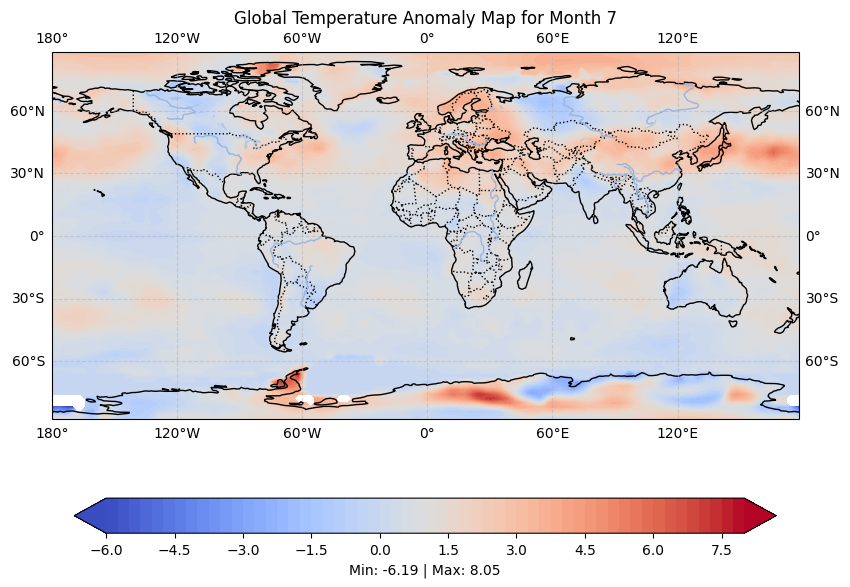

In [14]:
# Extract month value (directly use .data attribute to get scalar value)
month_value = mon.data if hasattr(mon, "data") else mon

# Check latitude direction (reverse if data is South->North)
if lat[0] > lat[-1]:
    lat = lat[::-1]
    ano = ano[::-1, :]  # Adjust data dimensions accordingly

# Create grid (if lat/lon are 1D, need meshgrid)
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Create figure and map projection
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Plot data (transpose ano to match lat/lon grid if needed)
contour = ax.contourf(lon_grid, lat_grid, ano,  # No transpose needed
                      60, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add colorbar
cbar = plt.colorbar(
    contour, ax=ax, orientation='horizontal', label='Anomaly Value',
    shrink=0.6, aspect=20
)
cbar.ax.set_xlabel(
    f'Min: {ano.min():.2f} | Max: {ano.max():.2f}',
    fontsize=10, ha='center'
)

# Add title and grid lines
plt.title(f'Global Temperature Anomaly Map for Month {int(month_value)}')
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()